In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [25]:
mu, sigma = 0, 1 
samples_per_action = 200
centers = np.random.normal(mu, sigma, 10)

In [26]:
all_data = [np.random.normal(c, 1, samples_per_action) for c in centers]

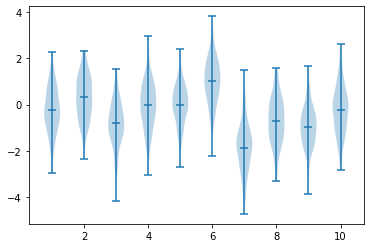

In [27]:
plt.violinplot(all_data,showmeans=True)
plt.show()

In [28]:
Q = np.random.normal(0, 1, 10)

In [29]:
q = centers.copy()

In [32]:
def updateQ(samples,Q,epsilon,iterations,parallel_tries):
    Q = Q.copy()
    Qs = np.reshape(np.repeat(Q, parallel_tries),(len(Q),parallel_tries)).T
    
    mean_trace = []
    
    for i in range(iterations):
        iteration_reward = 0
        for try_id in range(len(Qs)):
            if np.random.rand() < epsilon:
                a = np.random.randint(len(Q))
                
            else:
                a = np.argmax(Qs[try_id])
            
            reward = np.random.choice(all_data[a])
            iteration_reward += reward
            Qs[try_id][a] += .3*(reward - Qs[try_id][a])
        mean_trace.append(iteration_reward/parallel_tries)
    return mean_trace

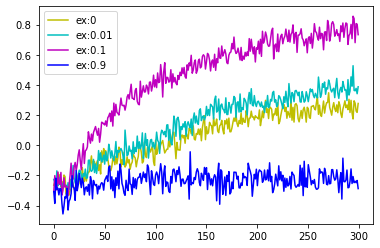

In [34]:
plt.plot(updateQ(all_data,Q.copy(),0,300,500),c="y",label=f"ex:{0}")
plt.plot(updateQ(all_data,Q.copy(),.01,300,500),c="c",label=f"ex:{0.01}")
plt.plot(updateQ(all_data,Q.copy(),.1,300,500),c="m",label=f"ex:{0.1}")
plt.plot(updateQ(all_data,Q.copy(),.9,300,500),c="b",label=f"ex:{0.9}")
plt.legend()
plt.show()